In [ ]:
import pandas as pd

indices=[['Zero Hidden Layer', 'One Hidden Layer', 'One Hidden Layer', 'Two Hidden Layer', 'Two Hidden Layer', 'Linear'],
['', 'Sigmoid', 'Relu', 'Sigmoid', 'Relu','']]

tuples = list(zip(*indices))
index = pd.MultiIndex.from_tuples(tuples)
test_accuracies = pd.Series(dtype=float, index=index, name='Test accuracies')
test_accuracies

Zero Hidden Layer            NaN
One Hidden Layer   Sigmoid   NaN
                   Relu      NaN
Two Hidden Layer   Sigmoid   NaN
                   Relu      NaN
Linear                       NaN
Name: Test accuracies, dtype: float64

# Zero Hidden Layer

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

def batch_generator(X, Y, batch_size, epochs):
    indices = np.arange(len(X))
    batch = []
    while True:
        np.random.shuffle(indices)
        for i in indices:
            batch.append(i)
            if len(batch)==batch_size:
                yield X[batch], Y[batch]
                batch = []
        yield 1, 0
        
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data("mnist.npz")
x_val = x_train[-10000:]
x_train = x_train[:-10000]
y_val = y_train[-10000:]
y_train = y_train[:-10000]

batchSize = 100

img = tf.placeholder(tf.float32, [batchSize, 784])
ans = tf.placeholder(tf.float32, [batchSize, 10])

#W and bW -- Input to Output layer
W = tf.Variable(tf.random_normal([784, 10], stddev=0.1))
bW = tf.Variable(tf.random_normal([10], stddev=0.1))

prbs = tf.nn.softmax(tf.matmul(img,W)+bW)
xEnt = tf.reduce_mean(-tf.reduce_sum(ans*tf.log(prbs),reduction_indices=[1]))

train = tf.train.GradientDescentOptimizer(0.5).minimize(xEnt)

numCorrect = tf.equal(tf.argmax(ans, 1), tf.argmax(prbs, 1))
accuracy =  tf.reduce_mean(tf.cast(numCorrect, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())


val_generator = batch_generator(x_val, y_val, batchSize, 100)

#validation
validation_accuracies = []
epoch_val = 0
flag = False
sumAcc = 0
max = 0
epochs = []
for i in range(1000):
    xs, ys = next(val_generator)
    if type(xs) == int:
        epoch_val += xs
        flag = True
        xs, ys = next(val_generator)
    xsn = xs.reshape(100, 784)
    ysn = np.zeros((ys.size,10))
    ysn[np.arange(ys.size), ys] = 1
    xsn = xsn/255

    sumAcc += sess.run(accuracy, feed_dict={img:xsn, ans:ysn})

    if flag == True:
        validation_accuracies.append(sumAcc)
        if max <= sumAcc:
            max = sumAcc
        else:
           epochs.append(epoch_val) 
        sumAcc = 0
        flag = False

train_generator = batch_generator(x_train, y_train, batchSize, 100)

#training
epoch_train = 0 
for i in range(1000):
    xs, ys = next(train_generator)
    if type(xs)== int:
        epoch_train += xs
        if epoch_train == epochs[0]:
            break
        xs, ys = next(train_generator)
    xsn = xs.reshape(100, 784)
    ysn = np.zeros((ys.size, ys.max()+1))
    ysn[np.arange(ys.size), ys] = 1
    xsn = xsn/255

    sess.run(train, feed_dict={img:xsn, ans:ysn})
    
test_generator = batch_generator(x_val, y_val, batchSize, 100)

#test
test_iterations = 1000
sumAcc = 0
epoch = 0
for i in range(test_iterations):
    xs, ys = next(test_generator)
    if type(xs)== int:
        epoch += xs
        xs, ys = next(test_generator)
    xsn = xs.reshape(100, 784)
    ysn = np.zeros((ys.size, ys.max()+1))
    ysn[np.arange(ys.size), ys] = 1
    xsn = xsn/255

    sumAcc += sess.run(accuracy, feed_dict={img:xsn, ans:ysn})

test_accuracies['Zero Hidden Layer'] = sumAcc/test_iterations
print(f"Test Accuracy: {sumAcc/test_iterations}")

Test Accuracy: 0.9196000015139579


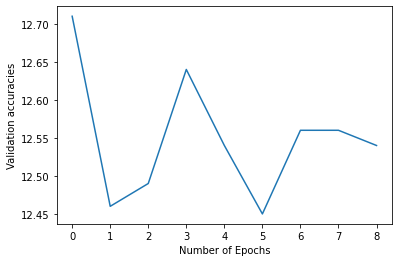

[2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
import matplotlib.pyplot as plt
plt.plot(validation_accuracies)
plt.xlabel('Number of Epochs')
plt.ylabel('Validation accuracies')
plt.xticks(np.arange(epoch_val))
plt.show()

# One Hidden Layer




Relu

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

print(tf.__version__)

def batch_generator(X, Y, batch_size, epochs):
    indices = np.arange(len(X))
    batch = []
    epoch = 0
    while True:
        np.random.shuffle(indices)
        for i in indices:
            batch.append(i)
            if len(batch)==batch_size:
                yield X[batch], Y[batch]
                batch = []
        epoch += 1
        yield 1, 0
        if epoch == epochs:
            epoch = 0
        


mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data("mnist.npz")
x_val = x_train[-10000:]
x_train = x_train[:-10000]
y_val = y_train[-10000:]
y_train = y_train[:-10000]

batchSize = 100

img = tf.placeholder(tf.float32, [batchSize, 784])
ans = tf.placeholder(tf.float32, [batchSize, 10])

nFirstLayerNodes = 20

#U and bU -- Input to hidden layer
U = tf.Variable(tf.random_normal([784, nFirstLayerNodes], stddev=0.1))
bU = tf.Variable(tf.random_normal([nFirstLayerNodes], stddev=0.1))

#V and bV -- Hiden to Output layer
V = tf.Variable(tf.random_normal([nFirstLayerNodes, 10], stddev=0.1))
bV = tf.Variable(tf.random_normal([10], stddev=0.1))

L1Output = tf.matmul(img, U) + bU
L1Output = tf.nn.relu(L1Output)

prbs = tf.nn.softmax(tf.matmul(L1Output,V)+bV)
xEnt = tf.reduce_mean(-tf.reduce_sum(ans*tf.log(prbs),reduction_indices=[1]))


train = tf.train.GradientDescentOptimizer(0.5).minimize(xEnt)

numCorrect = tf.equal(tf.argmax(ans, 1), tf.argmax(prbs, 1))
accuracy =  tf.reduce_mean(tf.cast(numCorrect, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())


val_generator = batch_generator(x_val, y_val, batchSize, 100)

#validation
validation_accuracies = []
epoch_val = 0
flag = False
sumAcc = 0
max = 0
for i in range(1000):
    xs, ys = next(val_generator)
    if type(xs)== int:
        epoch_val += xs
        flag = True
        xs, ys = next(val_generator)
    xsn = xs.reshape(100, 784)
    ysn = np.zeros((ys.size,10))
    ysn[np.arange(ys.size), ys] = 1
    xsn = xsn/255

    sumAcc += sess.run(accuracy, feed_dict={img:xsn, ans:ysn})

    if flag == True:
        validation_accuracies.append(sumAcc)
        if max <= sumAcc:
            max = sumAcc
        else:
            break
        sumAcc = 0
        flag = False
train_generator = batch_generator(x_train, y_train, batchSize, 100)

#training
epoch_train = 0 
for i in range(1000):
    xs, ys = next(train_generator)
    if type(xs)== int:
        epoch_train += xs
        if epoch_train == epoch_val:
            break
        xs, ys = next(train_generator)
    xsn = xs.reshape(100, 784)
    ysn = np.zeros((ys.size, ys.max()+1))
    ysn[np.arange(ys.size), ys] = 1
    xsn = xsn/255

    sess.run(train, feed_dict={img:xsn, ans:ysn})
    
test_generator = batch_generator(x_val, y_val, batchSize, 100)

#test
test_iterations = 1000
sumAcc = 0
epoch = 0
for i in range(test_iterations):
    xs, ys = next(test_generator)
    if type(xs)== int:
        epoch += xs
        xs, ys = next(test_generator)
    xsn = xs.reshape(100, 784)
    ysn = np.zeros((ys.size, ys.max()+1))
    ysn[np.arange(ys.size), ys] = 1
    xsn = xsn/255

    sumAcc += sess.run(accuracy, feed_dict={img:xsn, ans:ysn})

test_accuracies['One Hidden Layer', 'Relu'] = sumAcc/test_iterations
print(f"Test Accuracy: {sumAcc/test_iterations}")

2.3.0
Test Accuracy: 0.9424000018239022


Sigmoid

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

print(tf.__version__)

def batch_generator(X, Y, batch_size, epochs):
    indices = np.arange(len(X))
    batch = []
    epoch = 0
    while True:
        np.random.shuffle(indices)
        for i in indices:
            batch.append(i)
            if len(batch)==batch_size:
                yield X[batch], Y[batch]
                batch = []
        epoch += 1
        yield 1, 0
        if epoch == epochs:
            epoch = 0
        


mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data("mnist.npz")
x_val = x_train[-10000:]
x_train = x_train[:-10000]
y_val = y_train[-10000:]
y_train = y_train[:-10000]

batchSize = 100

img = tf.placeholder(tf.float32, [batchSize, 784])
ans = tf.placeholder(tf.float32, [batchSize, 10])

nFirstLayerNodes = 20

#U and bU -- Input to hidden layer
U = tf.Variable(tf.random_normal([784, nFirstLayerNodes], stddev=0.1))
bU = tf.Variable(tf.random_normal([nFirstLayerNodes], stddev=0.1))

#V and bV -- Hiden to Output layer
V = tf.Variable(tf.random_normal([nFirstLayerNodes, 10], stddev=0.1))
bV = tf.Variable(tf.random_normal([10], stddev=0.1))

L1Output = tf.matmul(img, U) + bU
L1Output = tf.nn.sigmoid(L1Output)

prbs = tf.nn.softmax(tf.matmul(L1Output,V)+bV)
xEnt = tf.reduce_mean(-tf.reduce_sum(ans*tf.log(prbs),reduction_indices=[1]))


train = tf.train.GradientDescentOptimizer(0.5).minimize(xEnt)

numCorrect = tf.equal(tf.argmax(ans, 1), tf.argmax(prbs, 1))
accuracy =  tf.reduce_mean(tf.cast(numCorrect, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())


val_generator = batch_generator(x_val, y_val, batchSize, 100)

#validation
validation_accuracies = []
epoch_val = 0
flag = False
sumAcc = 0
max = 0
for i in range(1000):
    xs, ys = next(val_generator)
    if type(xs)== int:
        epoch_val += xs
        flag = True
        xs, ys = next(val_generator)
    xsn = xs.reshape(100, 784)
    ysn = np.zeros((ys.size,10))
    ysn[np.arange(ys.size), ys] = 1
    xsn = xsn/255

    sumAcc += sess.run(accuracy, feed_dict={img:xsn, ans:ysn})

    if flag == True:
        validation_accuracies.append(sumAcc)
        if max <= sumAcc:
            max = sumAcc
        else:
            break
        sumAcc = 0
        flag = False
train_generator = batch_generator(x_train, y_train, batchSize, 100)

#training
epoch_train = 0 
for i in range(1000):
    xs, ys = next(train_generator)
    if type(xs)== int:
        epoch_train += xs
        if epoch_train == epoch_val:
            break
        xs, ys = next(train_generator)
    xsn = xs.reshape(100, 784)
    ysn = np.zeros((ys.size, ys.max()+1))
    ysn[np.arange(ys.size), ys] = 1
    xsn = xsn/255

    sess.run(train, feed_dict={img:xsn, ans:ysn})
    
test_generator = batch_generator(x_val, y_val, batchSize, 100)

#test
test_iterations = 1000
sumAcc = 0
epoch = 0
for i in range(test_iterations):
    xs, ys = next(test_generator)
    if type(xs)== int:
        epoch += xs
        xs, ys = next(test_generator)
    xsn = xs.reshape(100, 784)
    ysn = np.zeros((ys.size, ys.max()+1))
    ysn[np.arange(ys.size), ys] = 1
    xsn = xsn/255

    sumAcc += sess.run(accuracy, feed_dict={img:xsn, ans:ysn})

test_accuracies['One Hidden Layer', 'Sigmoid'] = sumAcc/test_iterations
print(f"Test Accuracy: {sumAcc/test_iterations}")

2.3.0
Test Accuracy: 0.9297000024914741


# Two Hidden Layers

Relu

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

print(tf.__version__)

def batch_generator(X, Y, batch_size, epochs):
    indices = np.arange(len(X))
    batch = []
    epoch = 0
    while True:
        np.random.shuffle(indices)
        for i in indices:
            batch.append(i)
            if len(batch)==batch_size:
                yield X[batch], Y[batch]
                batch = []
        epoch += 1
        yield 1, 0
        if epoch == epochs:
            epoch = 0
        


mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data("mnist.npz")
x_val = x_train[-10000:]
x_train = x_train[:-10000]
y_val = y_train[-10000:]
y_train = y_train[:-10000]

batchSize = 100

img = tf.placeholder(tf.float32, [batchSize, 784])
ans = tf.placeholder(tf.float32, [batchSize, 10])

nFirstLayerNodes = 19
nSecondLayerNodes = 34

#U and bU -- Input to hidden layer 1
U = tf.Variable(tf.random_normal([784, nFirstLayerNodes], stddev=0.1))
bU = tf.Variable(tf.random_normal([nFirstLayerNodes], stddev=0.1))

#W and bW -- Hidden layer 1 to Hidden layer 2
W = tf.Variable(tf.random_normal([nFirstLayerNodes, nSecondLayerNodes], stddev=0.1))
bW = tf.Variable(tf.random_normal([nSecondLayerNodes], stddev=0.1))

#V and bV -- Hidden layer 2 to Output
V = tf.Variable(tf.random_normal([nSecondLayerNodes, 10], stddev=0.1))
bV = tf.Variable(tf.random_normal([10], stddev=0.1))


L1Output = tf.matmul(img, U) + bU
L1Output = tf.nn.relu(L1Output)

L2Output = tf.matmul(L1Output, W) + bW
L2Output = tf.nn.relu(L2Output)

prbs = tf.nn.softmax(tf.matmul(L2Output,V)+bV)
xEnt = tf.reduce_mean(-tf.reduce_sum(ans*tf.log(prbs),reduction_indices=[1]))


train = tf.train.GradientDescentOptimizer(0.5).minimize(xEnt)

numCorrect = tf.equal(tf.argmax(ans, 1), tf.argmax(prbs, 1))
accuracy =  tf.reduce_mean(tf.cast(numCorrect, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())


val_generator = batch_generator(x_val, y_val, batchSize, 100)

#validation
validation_accuracies = []
epoch_val = 0
flag = False
sumAcc = 0
max = 0
for i in range(1000):
    xs, ys = next(val_generator)
    if type(xs)== int:
        epoch_val += xs
        flag = True
        xs, ys = next(val_generator)
    xsn = xs.reshape(100, 784)
    ysn = np.zeros((ys.size,10))
    ysn[np.arange(ys.size), ys] = 1
    xsn = xsn/255

    sumAcc += sess.run(accuracy, feed_dict={img:xsn, ans:ysn})

    if flag == True:
        validation_accuracies.append(sumAcc)
        if max <= sumAcc:
            max = sumAcc
        else:
            break
        sumAcc = 0
        flag = False
train_generator = batch_generator(x_train, y_train, batchSize, 100)

#training
epoch_train = 0 
for i in range(1000):
    xs, ys = next(train_generator)
    if type(xs)== int:
        epoch_train += xs
        if epoch_train == epoch_val:
            break
        xs, ys = next(train_generator)
    xsn = xs.reshape(100, 784)
    ysn = np.zeros((ys.size, ys.max()+1))
    ysn[np.arange(ys.size), ys] = 1
    xsn = xsn/255

    sess.run(train, feed_dict={img:xsn, ans:ysn})
    
test_generator = batch_generator(x_val, y_val, batchSize, 100)

#test
test_iterations = 1000
sumAcc = 0
epoch = 0
for i in range(test_iterations):
    xs, ys = next(test_generator)
    if type(xs)== int:
        epoch += xs
        xs, ys = next(test_generator)
    xsn = xs.reshape(100, 784)
    ysn = np.zeros((ys.size, ys.max()+1))
    ysn[np.arange(ys.size), ys] = 1
    xsn = xsn/255

    sumAcc += sess.run(accuracy, feed_dict={img:xsn, ans:ysn})

test_accuracies['Two Hidden Layer', 'Relu'] = sumAcc/test_iterations
print(f"Test Accuracy: {sumAcc/test_iterations}")

2.3.0
Test Accuracy: 0.9475000011324882


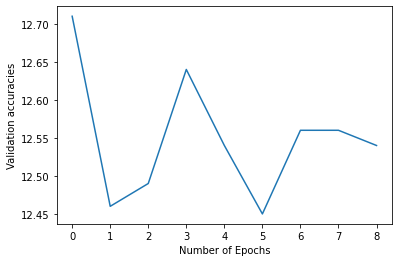

In [ ]:
import matplotlib.pyplot as plt
plt.plot(validation_accuracies)
plt.xlabel('Number of Epochs')
plt.ylabel('Validation accuracies')
plt.xticks(np.arange(epoch_val))
plt.show()


Sigmoid

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

print(tf.__version__)

def batch_generator(X, Y, batch_size, epochs):
    indices = np.arange(len(X))
    batch = []
    epoch = 0
    while True:
        np.random.shuffle(indices)
        for i in indices:
            batch.append(i)
            if len(batch)==batch_size:
                yield X[batch], Y[batch]
                batch = []
        epoch += 1
        yield 1, 0
        if epoch == epochs:
            epoch = 0
        


mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data("mnist.npz")
x_val = x_train[-10000:]
x_train = x_train[:-10000]
y_val = y_train[-10000:]
y_train = y_train[:-10000]

batchSize = 100

img = tf.placeholder(tf.float32, [batchSize, 784])
ans = tf.placeholder(tf.float32, [batchSize, 10])

nFirstLayerNodes = 19
nSecondLayerNodes = 34

#U and bU -- Input to hidden layer 1
U = tf.Variable(tf.random_normal([784, nFirstLayerNodes], stddev=0.1))
bU = tf.Variable(tf.random_normal([nFirstLayerNodes], stddev=0.1))

#W and bW -- Hidden layer 1 to Hidden layer 2
W = tf.Variable(tf.random_normal([nFirstLayerNodes, nSecondLayerNodes], stddev=0.1))
bW = tf.Variable(tf.random_normal([nSecondLayerNodes], stddev=0.1))

#V and bV -- Hidden layer 2 to Output
V = tf.Variable(tf.random_normal([nSecondLayerNodes, 10], stddev=0.1))
bV = tf.Variable(tf.random_normal([10], stddev=0.1))


L1Output = tf.matmul(img, U) + bU
L1Output = tf.nn.sigmoid(L1Output)

L2Output = tf.matmul(L1Output, W) + bW
L2Output = tf.nn.sigmoid(L2Output)

prbs = tf.nn.softmax(tf.matmul(L2Output,V)+bV)
xEnt = tf.reduce_mean(-tf.reduce_sum(ans*tf.log(prbs),reduction_indices=[1]))


train = tf.train.GradientDescentOptimizer(0.5).minimize(xEnt)

numCorrect = tf.equal(tf.argmax(ans, 1), tf.argmax(prbs, 1))
accuracy =  tf.reduce_mean(tf.cast(numCorrect, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())


val_generator = batch_generator(x_val, y_val, batchSize, 100)

#validation
validation_accuracies = []
epoch_val = 0
flag = False
sumAcc = 0
max = 0
for i in range(1000):
    xs, ys = next(val_generator)
    if type(xs)== int:
        epoch_val += xs
        flag = True
        xs, ys = next(val_generator)
    xsn = xs.reshape(100, 784)
    ysn = np.zeros((ys.size,10))
    ysn[np.arange(ys.size), ys] = 1
    xsn = xsn/255

    sumAcc += sess.run(accuracy, feed_dict={img:xsn, ans:ysn})

    if flag == True:
        validation_accuracies.append(sumAcc)
        if max <= sumAcc:
            max = sumAcc
        else:
            break
        sumAcc = 0
        flag = False
train_generator = batch_generator(x_train, y_train, batchSize, 100)

#training
epoch_train = 0 
for i in range(1000):
    xs, ys = next(train_generator)
    if type(xs)== int:
        epoch_train += xs
        if epoch_train == epoch_val:
            break
        xs, ys = next(train_generator)
    xsn = xs.reshape(100, 784)
    ysn = np.zeros((ys.size, ys.max()+1))
    ysn[np.arange(ys.size), ys] = 1
    xsn = xsn/255

    sess.run(train, feed_dict={img:xsn, ans:ysn})
    
test_generator = batch_generator(x_val, y_val, batchSize, 100)

#test
test_iterations = 1000
sumAcc = 0
epoch = 0
for i in range(test_iterations):
    xs, ys = next(test_generator)
    if type(xs)== int:
        epoch += xs
        xs, ys = next(test_generator)
    xsn = xs.reshape(100, 784)
    ysn = np.zeros((ys.size, ys.max()+1))
    ysn[np.arange(ys.size), ys] = 1
    xsn = xsn/255

    sumAcc += sess.run(accuracy, feed_dict={img:xsn, ans:ysn})

test_accuracies['Two Hidden Layer', 'Sigmoid'] = sumAcc/test_iterations
print(f"Test Accuracy: {sumAcc/test_iterations}")

2.3.0
Test Accuracy: 0.9102000018358231


# Linear

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

def batch_generator(X, Y, batch_size, epochs):
    indices = np.arange(len(X))
    batch = []
    epoch = 0
    while True:
        np.random.shuffle(indices)
        for i in indices:
            batch.append(i)
            if len(batch)==batch_size:
                yield X[batch], Y[batch]
                batch = []
        epoch += 1
        yield 1, 0
        if epoch == epochs:
            epoch = 0
        
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data("mnist.npz")
x_val = x_train[-10000:]
x_train = x_train[:-10000]
y_val = y_train[-10000:]
y_train = y_train[:-10000]

batchSize = 100

img = tf.placeholder(tf.float32, [batchSize, 784])
ans = tf.placeholder(tf.float32, [batchSize, 10])

#W and bW -- Input to Output layer
W = tf.Variable(tf.random_normal([784, 10], stddev=0.1))
bW = tf.Variable(tf.random_normal([10], stddev=0.1))

prbs = tf.matmul(img,W)+bW
xEnt = tf.reduce_mean(-tf.reduce_sum(ans*tf.log(prbs),reduction_indices=[1]))

train = tf.train.GradientDescentOptimizer(0.5).minimize(xEnt)

numCorrect = tf.equal(tf.argmax(ans, 1), tf.argmax(prbs, 1))
accuracy =  tf.reduce_mean(tf.cast(numCorrect, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())


val_generator = batch_generator(x_val, y_val, batchSize, 100)

#validation
validation_accuracies = []
epoch_val = 0
flag = False
sumAcc = 0
max = 0
for i in range(1000):
    xs, ys = next(val_generator)
    if type(xs)== int:
        epoch_val += xs
        flag = True
        xs, ys = next(val_generator)
    xsn = xs.reshape(100, 784)
    ysn = np.zeros((ys.size,10))
    ysn[np.arange(ys.size), ys] = 1
    xsn = xsn/255

    sumAcc += sess.run(accuracy, feed_dict={img:xsn, ans:ysn})

    if flag == True:
        validation_accuracies.append(sumAcc)
        if max <= sumAcc:
            max = sumAcc
        else:
            break
        sumAcc = 0
        flag = False
train_generator = batch_generator(x_train, y_train, batchSize, 100)

#training
epoch_train = 0 
for i in range(1000):
    xs, ys = next(train_generator)
    if type(xs)== int:
        epoch_train += xs
        if epoch_train == epoch_val:
            break
        xs, ys = next(train_generator)
    xsn = xs.reshape(100, 784)
    ysn = np.zeros((ys.size, ys.max()+1))
    ysn[np.arange(ys.size), ys] = 1
    xsn = xsn/255

    sess.run(train, feed_dict={img:xsn, ans:ysn})
    
test_generator = batch_generator(x_val, y_val, batchSize, 100)

#test
test_iterations = 1000
sumAcc = 0
epoch = 0
for i in range(test_iterations):
    xs, ys = next(test_generator)
    if type(xs)== int:
        epoch += xs
        xs, ys = next(test_generator)
    xsn = xs.reshape(100, 784)
    ysn = np.zeros((ys.size, ys.max()+1))
    ysn[np.arange(ys.size), ys] = 1
    xsn = xsn/255

    sumAcc += sess.run(accuracy, feed_dict={img:xsn, ans:ysn})

test_accuracies['Linear'] = sumAcc/test_iterations
print(f"Test Accuracy: {sumAcc/test_iterations}")

Test Accuracy: 0.4452999970912933


In [ ]:
test_accuracies

Zero Hidden Layer             0.9187
One Hidden Layer   Sigmoid    0.9297
                   Relu       0.9424
Two Hidden Layer   Sigmoid    0.9102
                   Relu       0.9475
Linear                        0.4453
Name: Test accuracies, dtype: float64